In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [18]:
n_neighbors = 15
h = .02  # step size in the mesh

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, [2,3]]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [3]:
# we create an instance of KNN Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
y_pred = clf.predict(X)
print("Tasa:",np.mean(y == y_pred))

Tasa: 0.96


In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

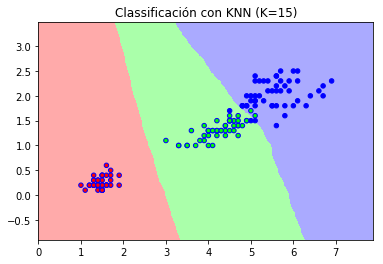

In [7]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='b', s=20)
plt.title("Classificación con KNN (K={0})".format(n_neighbors))
plt.axis('tight')

plt.show()

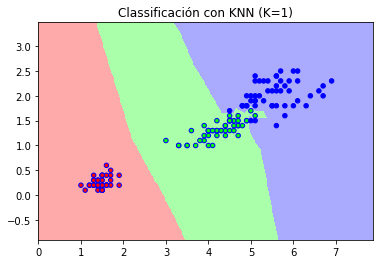

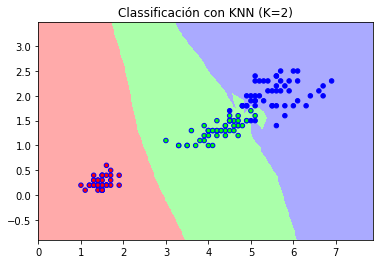

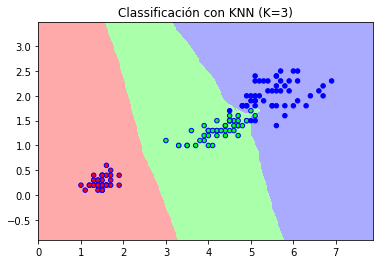

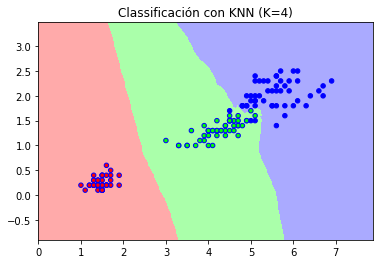

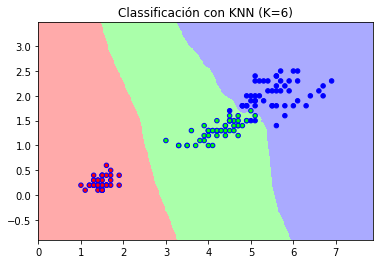

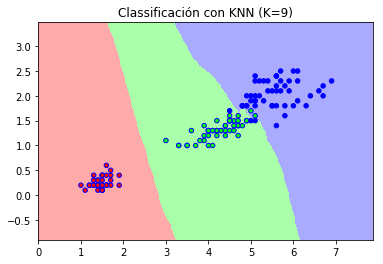

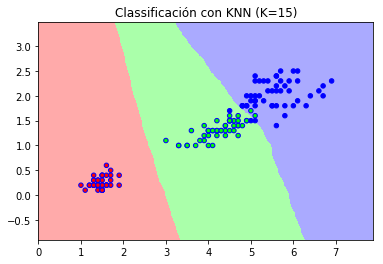

In [9]:
for n_neighbors in [1,2,3,4,6,9,15]:
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='b', s=20)
    plt.title("Classificación con KNN (K={0})".format(n_neighbors))
    plt.axis('tight')

    plt.show()